# TimeSeries prediction models comparison

In [2]:
import matplotlib.pyplot as plt

from utils import HORIZONS, read_results

In [7]:
df = read_results()
df.head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
0,5.771838,0.007527,0.086758,0.064282,NaiveSeasonal,1,electricity,1715710719.531552,{'K': 1}
1,3.092076,0.90624,0.951967,0.679575,NaiveSeasonal,1,weather,1717294686.590629,{'K': 1}
2,14.127706,11892225.511994,3448.510622,2525.763019,LightGBMModel,1,walmart-sales,1716819289.521527,"{'lags': 1, 'lags_past_covariates': 1, 'lags_f..."
3,23.479792,0.08795,0.296564,0.211588,Prophet,5,electricity,1716814327.173869,"{'add_seasonalities': None, 'country_holidays'..."
4,3.7561,1.193095,1.092289,0.824286,ARIMA,3,weather,1717296040.532335,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
5,9.389221,5818889.84911,2412.237519,1823.913871,XGBModel,1,walmart-sales,1716819289.250583,"{'lags': 3, 'lags_past_covariates': 2, 'lags_f..."
6,24.019902,0.093187,0.305265,0.215511,Prophet,9,electricity,1716814406.310433,"{'add_seasonalities': None, 'country_holidays'..."
7,4.196156,1.609963,1.268843,0.926357,NaiveSeasonal,10,weather,1717294689.658464,{'K': 1}
8,19.46885,35584388.061474,5965.265129,3672.310538,ARIMA,1,walmart-sales,1716819288.986583,"{'p': 7, 'd': 2, 'q': 0, 'seasonal_order': [0,..."
9,25.8956,0.126425,0.355562,0.282404,LightGBMModel,7,electricity,1717837762.833918,"{'lags': 24, 'lags_past_covariates': None, 'la..."


## Model comparison

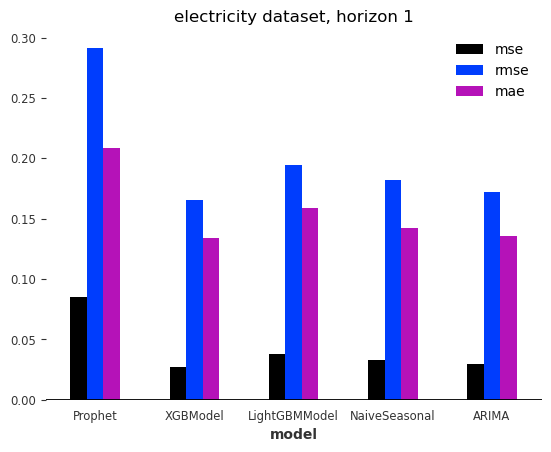

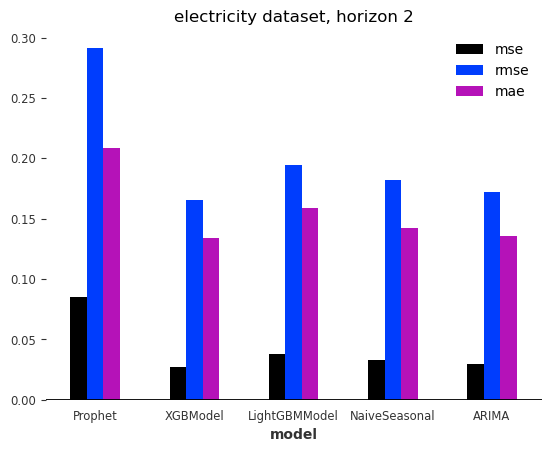

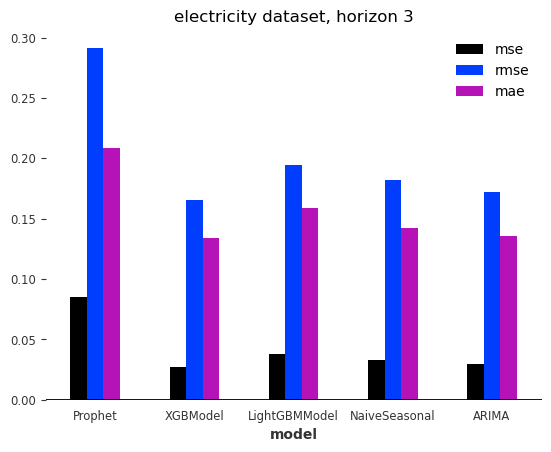

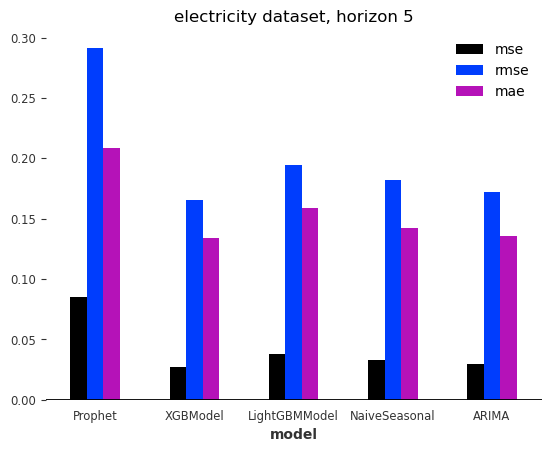

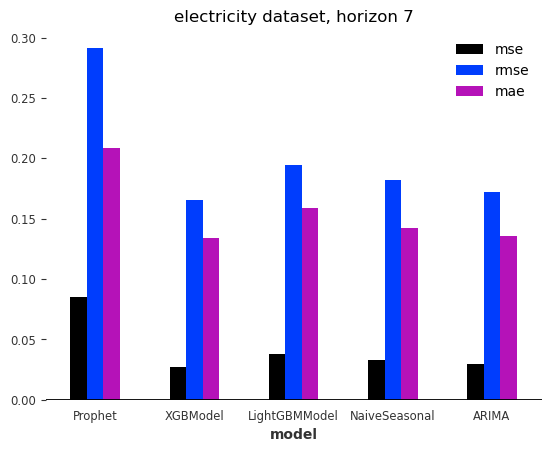

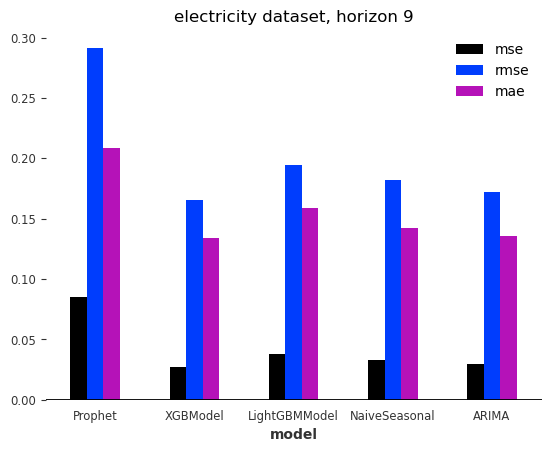

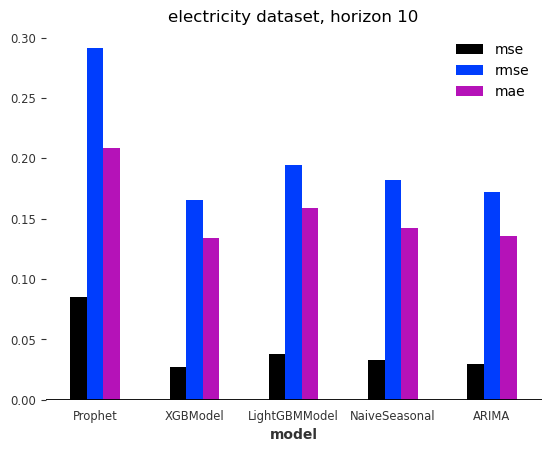

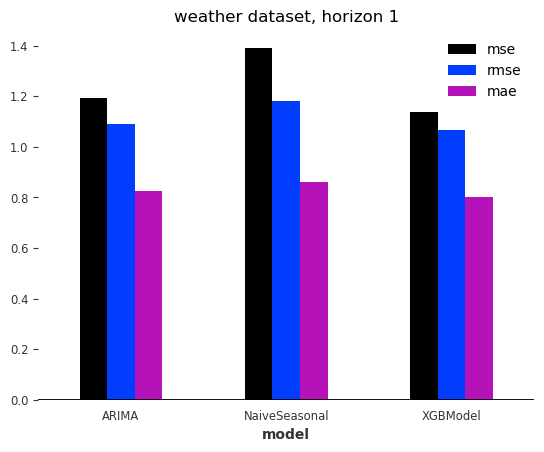

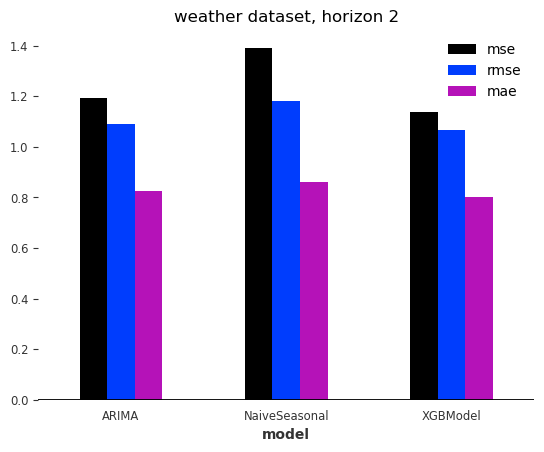

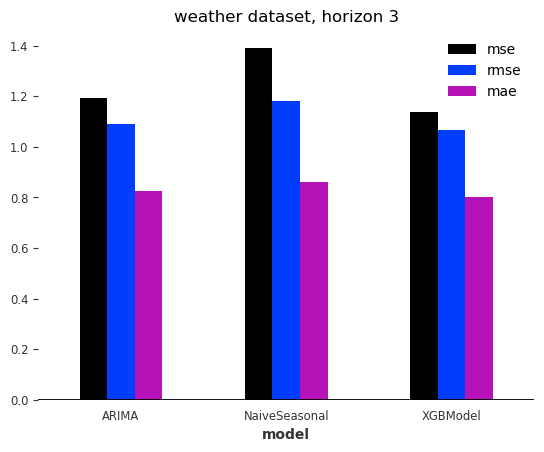

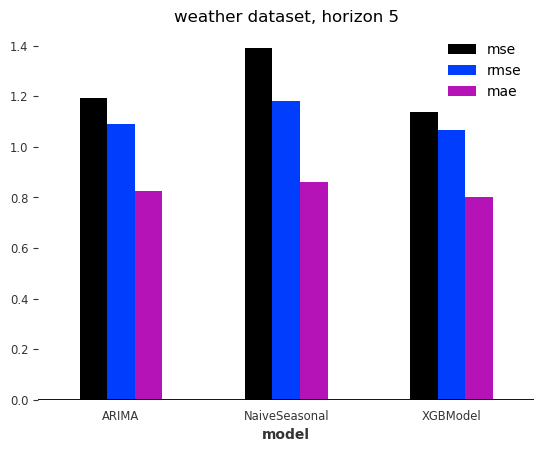

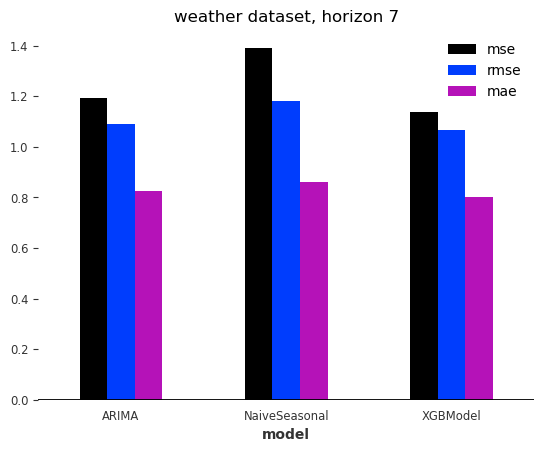

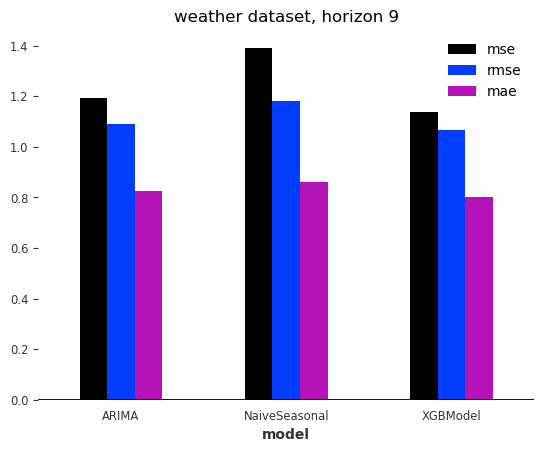

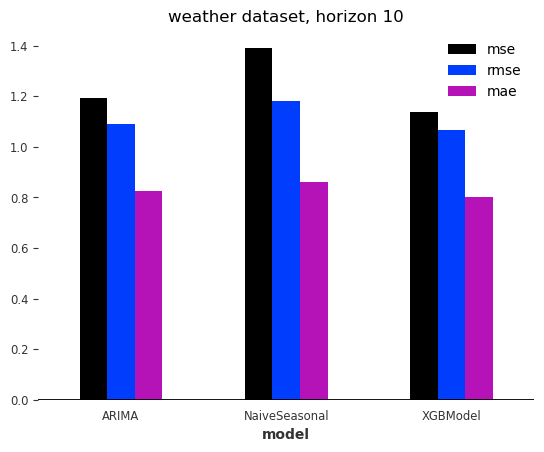

TypeError: no numeric data to plot

In [8]:
# take unique valeus from dataset column
datesets = df["dataset"].unique()

for dataset in datesets:
    for horizon in HORIZONS:
        df_walmart = df[df["dataset"] == dataset]
        df_walmart = df_walmart[df_walmart["forecast_horizon"] == 3]
        df_walmart.plot(x="model", y=["mse", "rmse", "mae"], kind="bar")

        plt.title(f"{dataset} dataset, horizon {horizon}")
        plt.xticks(rotation=0)
        plt.grid(False)
        plt.axhline(y=0, color="k")
        plt.show()

In [15]:
df.where(df["dataset"] == "electricity").dropna().sort_values("model").head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
58,29.829497,0.173442,0.416463,0.317386,ARIMA,10,electricity,1715710763.683538,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
28,23.225391,0.105998,0.325573,0.254489,ARIMA,7,electricity,1715710752.281612,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
10,5.602879,0.006738,0.082088,0.061334,ARIMA,1,electricity,1715710729.405588,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
53,12.196445,0.029679,0.172276,0.13582,ARIMA,3,electricity,1715710740.674662,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
39,27.733631,0.150672,0.388165,0.298638,ARIMA,9,electricity,1715710758.045732,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
51,9.00516,0.016507,0.128479,0.099446,ARIMA,2,electricity,1715710735.117437,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
43,18.11556,0.064087,0.253154,0.200923,ARIMA,5,electricity,1715710746.215999,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
30,10.594757,0.021199,0.145598,0.116085,LightGBMModel,2,electricity,1717837761.665033,"{'lags': 24, 'lags_past_covariates': None, 'la..."
26,6.182,0.007758,0.088081,0.067384,LightGBMModel,1,electricity,1717837626.076948,"{'lags': 24, 'lags_past_covariates': None, 'la..."
22,33.27433,0.198851,0.445928,0.356547,LightGBMModel,10,electricity,1717837763.779243,"{'lags': 24, 'lags_past_covariates': None, 'la..."


## Time horizons

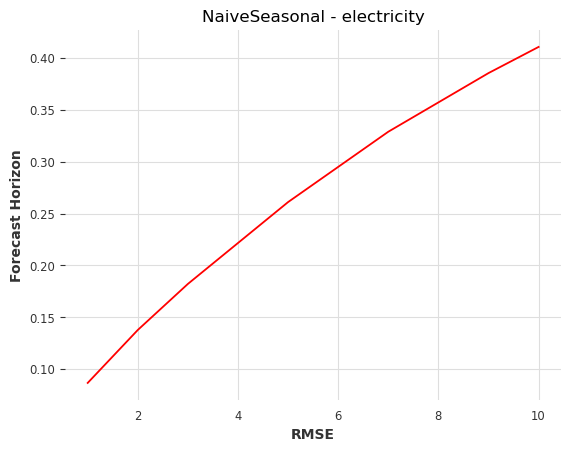

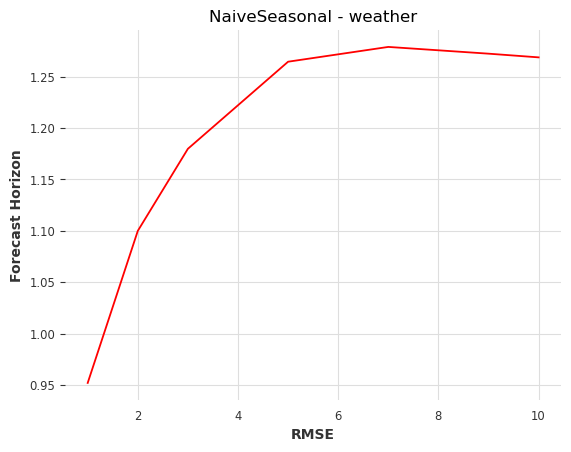

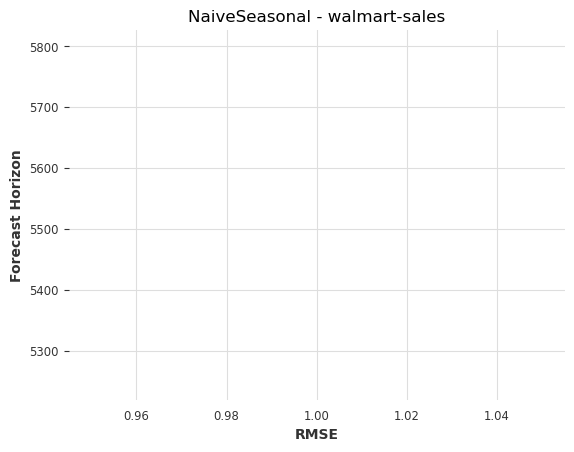

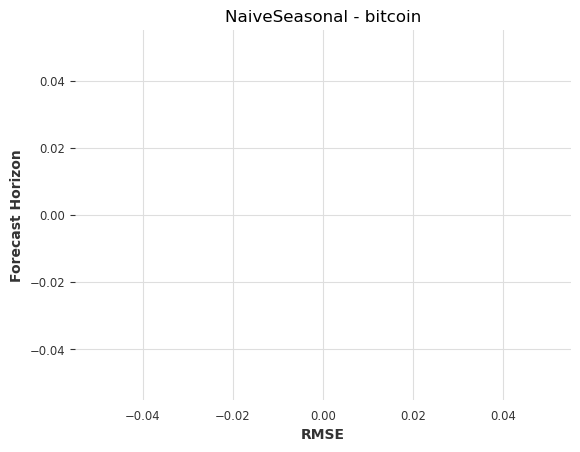

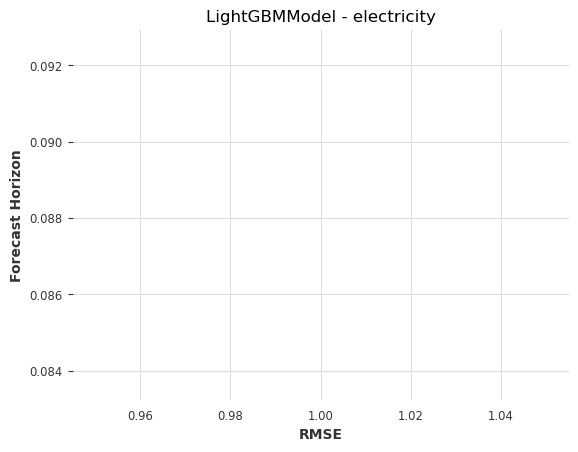

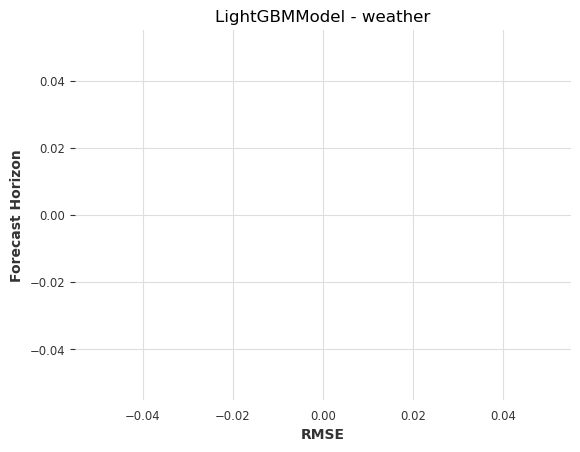

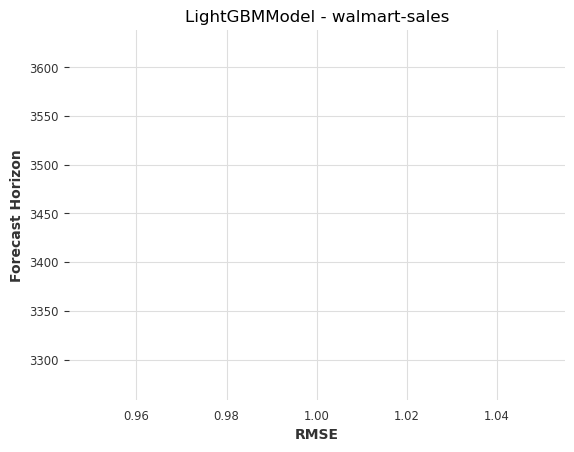

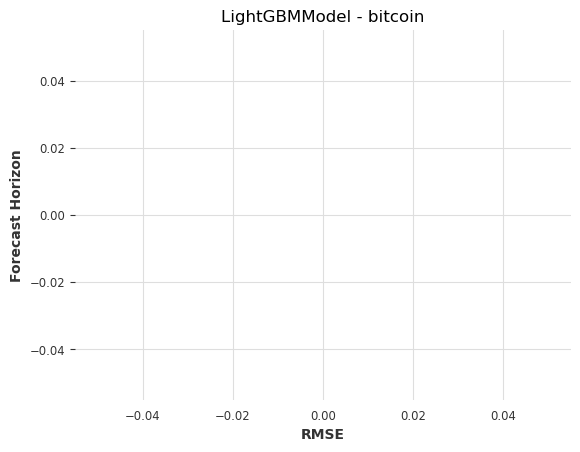

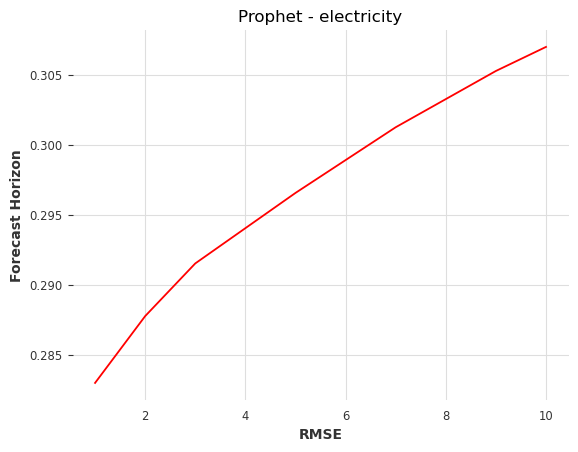

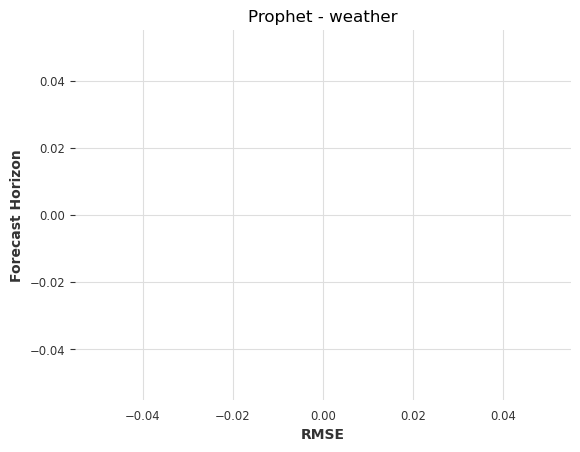

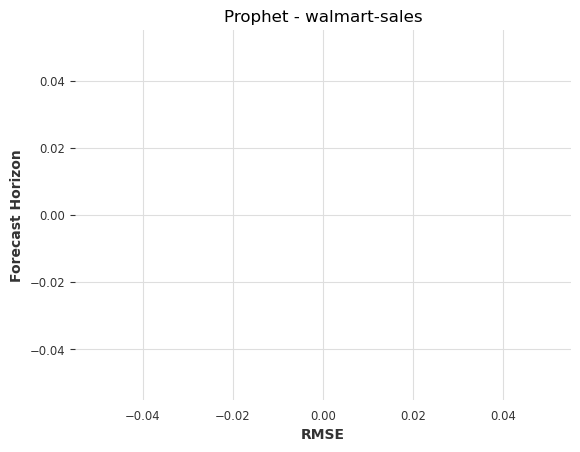

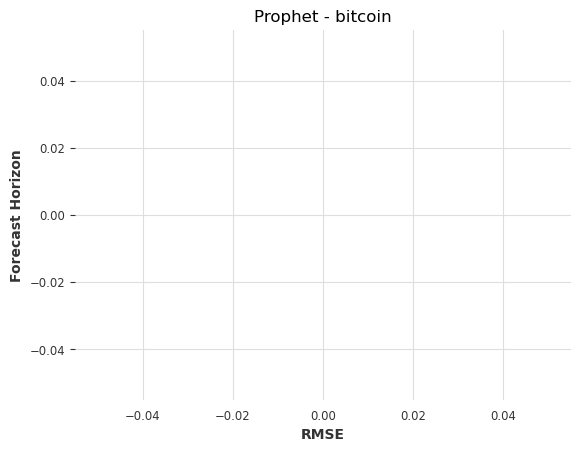

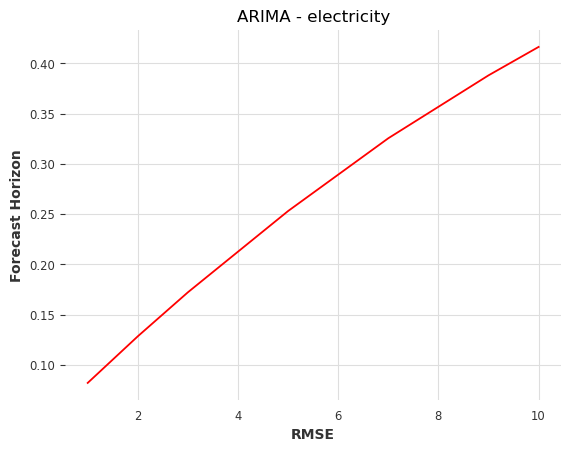

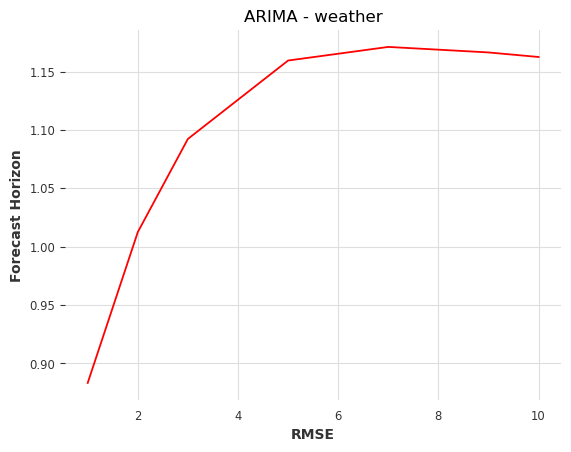

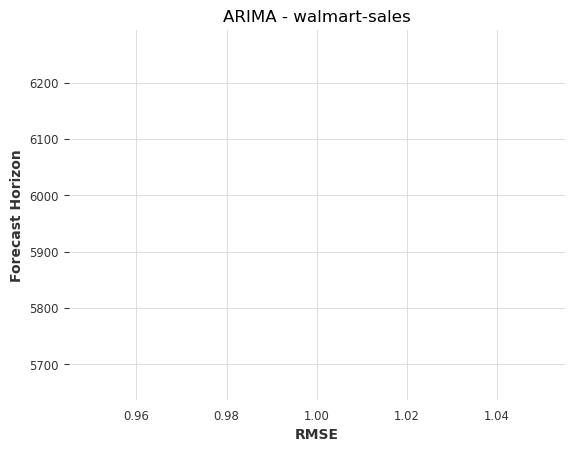

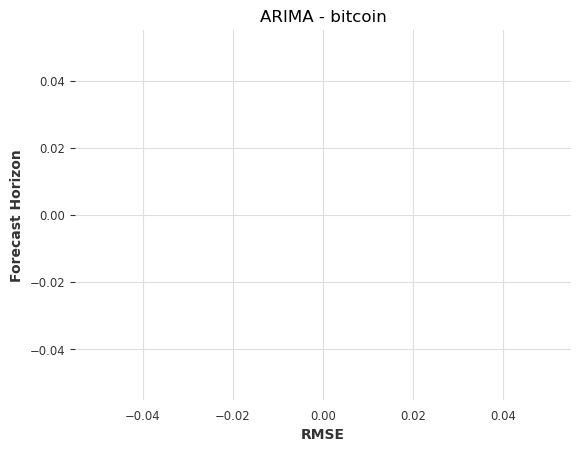

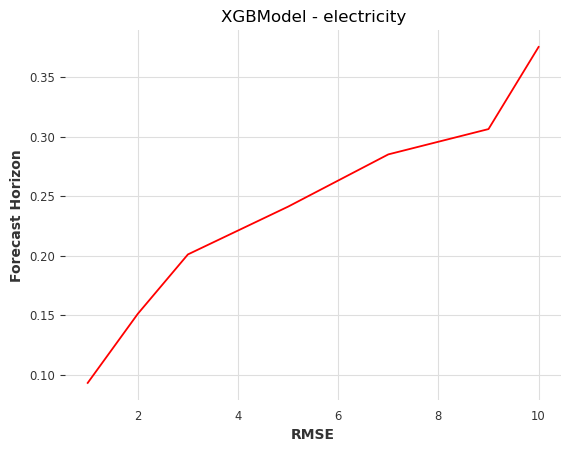

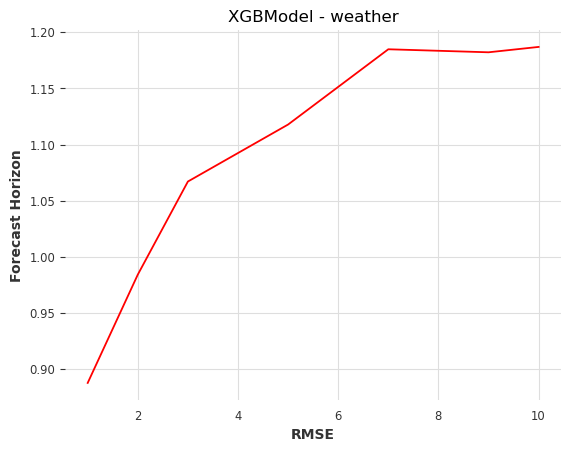

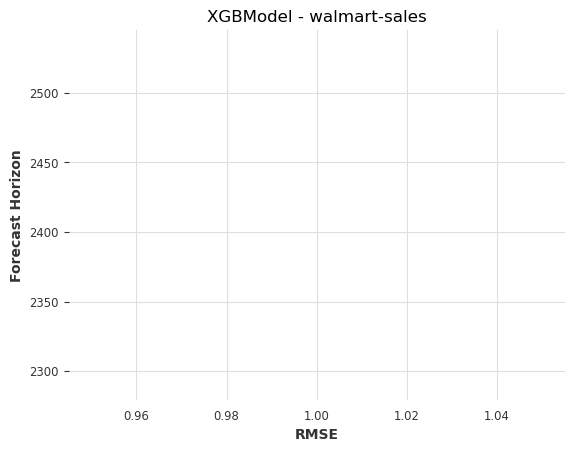

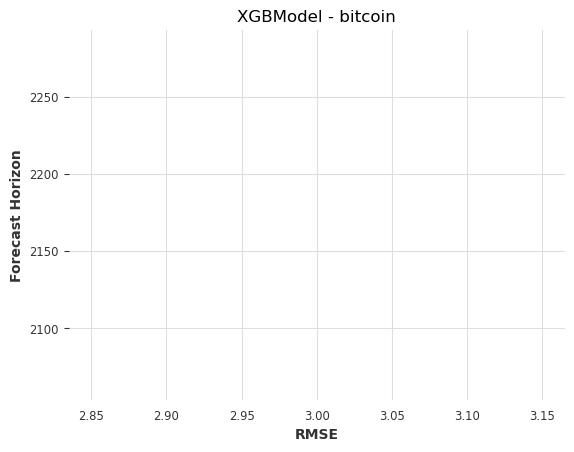

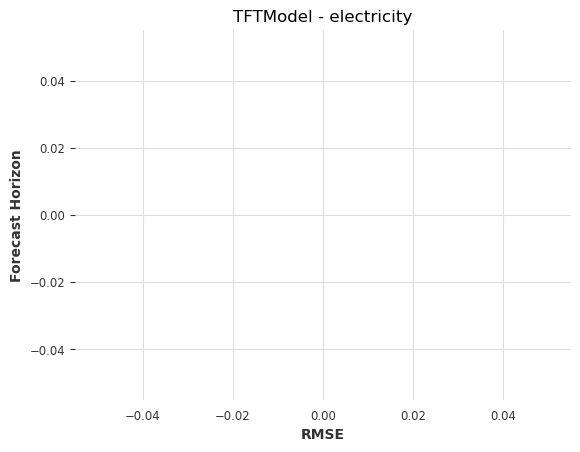

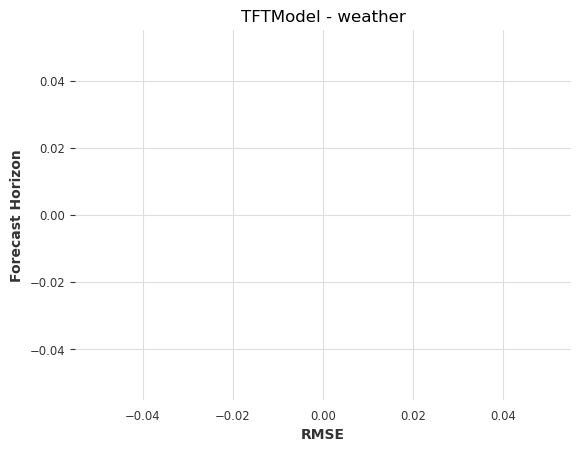

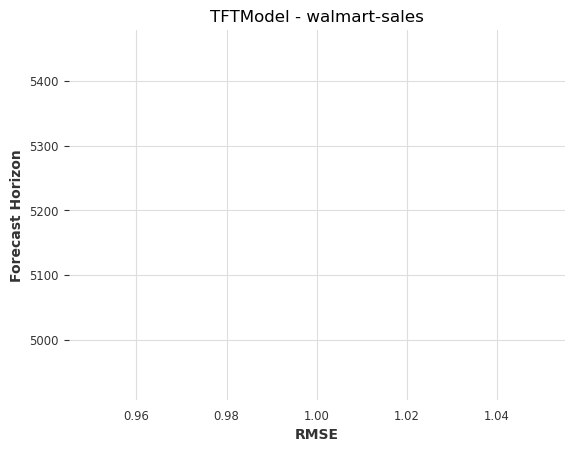

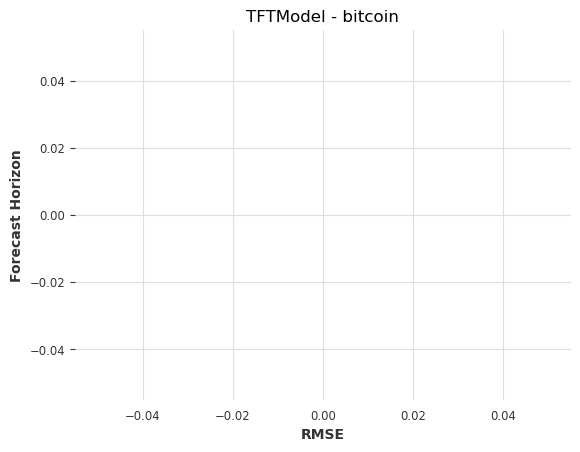

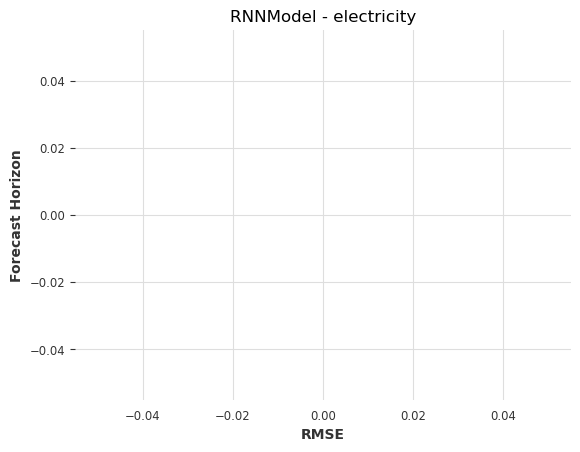

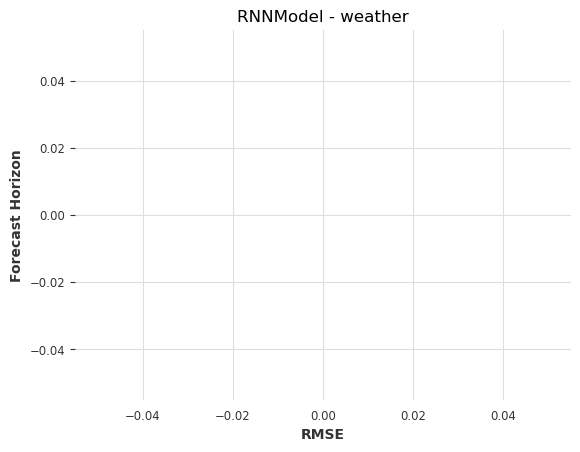

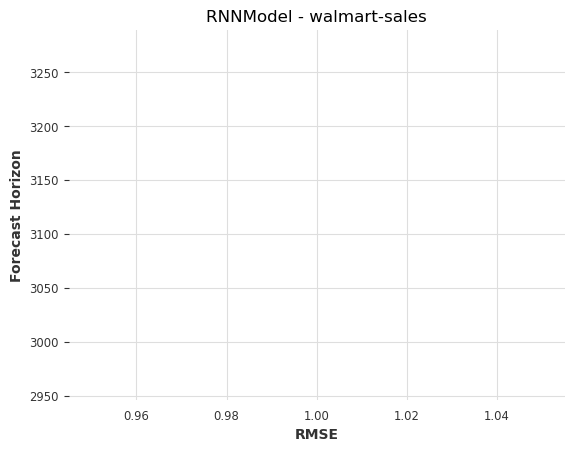

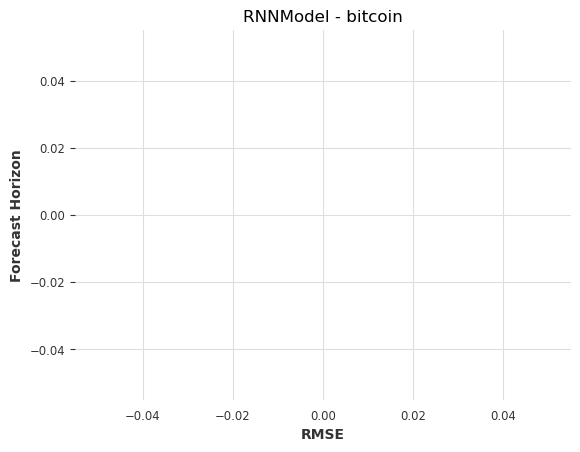

In [5]:
datasets = df["dataset"].unique()
models = df["model"].unique()
horizons = df["forecast_horizon"].unique()

for model in models:
    for dataset in datasets:
        df_subset = df[(df["dataset"] == dataset) & (df["model"] == model)].sort_values("forecast_horizon")
        plt.plot(df_subset["forecast_horizon"], df_subset["rmse"], color="red")
        plt.ylabel("Forecast Horizon")
        plt.xlabel("RMSE")
        plt.title(f"{model} - {dataset}")
        plt.savefig(f"results/horizon-plots/{model}-{dataset}.png")
        plt.show()


### Walmart-sales

In [ ]:
df_walmart = df[df["dataset"] == "walmart-sales"]

df_walmart.plot(x="model", y=["mse", "rmse", "mae"], kind="bar")

TypeError: no numeric data to plot